In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dropout

In [ ]:
#reading dataset
exchange_data = pd.read_csv('INRUSD.csv')
exchange_data.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,2023-01-31,0.01223,0.01227,0.01227,0.01219,0,-0.30%
1,2023-01-30,0.01227,0.01227,0.01228,0.01224,0,0.00%
2,2023-01-29,0.01227,0.01227,0.01227,0.01227,0,0.00%
3,2023-01-27,0.01227,0.01228,0.01228,0.01225,0,-0.07%
4,2023-01-26,0.01228,0.01227,0.01229,0.01226,0,0.07%


In [ ]:
exchange_data["Date"] = pd.to_datetime(exchange_data["Date"])
ind_exchange_data = exchange_data.set_index(["Date"], drop=True)

In [ ]:
#checking first few records of the dataset
ind_exchange_data.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-01-31,0.01223,0.01227,0.01227,0.01219,0,-0.30%
2023-01-30,0.01227,0.01227,0.01228,0.01224,0,0.00%
2023-01-29,0.01227,0.01227,0.01227,0.01227,0,0.00%
2023-01-27,0.01227,0.01228,0.01228,0.01225,0,-0.07%
2023-01-26,0.01228,0.01227,0.01229,0.01226,0,0.07%


In [ ]:
# sorting the dataset in ascending order of date
data_frame = ind_exchange_data.sort_index(axis=1 ,ascending=True)
data_frame = data_frame.iloc[::-1]
data_frame.head()

,Chg%,High,Low,Open,Price,Volume
Date,,,,,,
2016-01-03,0.00%,0.0151,0.0151,0.0151,0.0151,0
2016-01-04,-0.66%,0.0151,0.0150,0.0151,0.0150,0
2016-01-05,0.00%,0.0151,0.0150,0.0150,0.0150,0
2016-01-06,0.00%,0.0150,0.0150,0.0150,0.0150,0
2016-01-07,-0.67%,0.0150,0.0149,0.0150,0.0149,0


<AxesSubplot:xlabel='Date'>

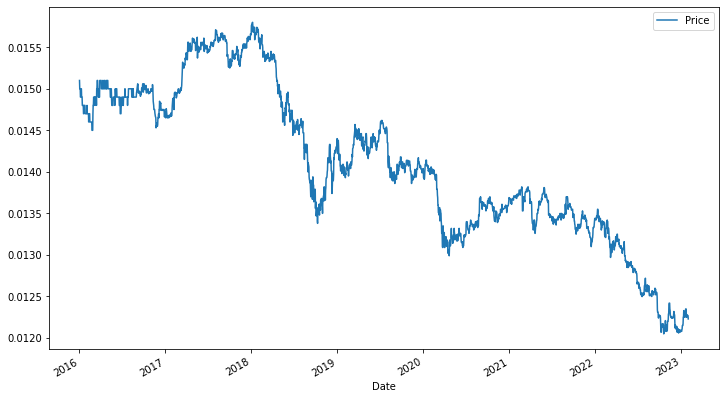

In [ ]:
df = data_frame[["Price"]]

#plotting dataset to visualize the pattern of prices over the years

df.plot(kind='line',figsize=(12,7))

In [ ]:
diff = df.index.values[-1] - df.index.values[0]
days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 2016 to %d"%(2016 + int(0.8*years)))

Total data: 7 years
80 percent data = 2016 to 2021


# Statistics

In [ ]:
df.describe()

,Price
count,2217.000000
mean,0.014097
std,0.000940
min,0.012050
25%,0.013420
50%,0.014040
75%,0.014900
max,0.015800


# Train Test Split
As we have seen 80% of the data lies in the interval of 2016 and 2021 so we will train the model for the date range of 01 January 2016 to 01 January 2021 and rest will be used as the testing data

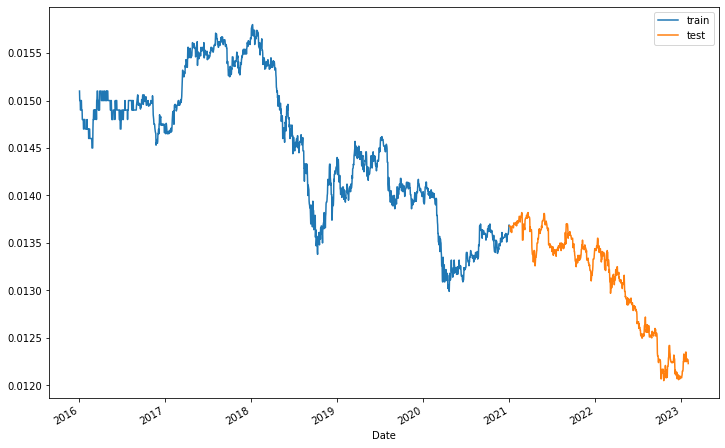

In [ ]:
split_date = pd.Timestamp('01-01-2021')

train = df.loc[:split_date]
test = df.loc[split_date:]

ax = train.plot(kind='line',figsize=(12,8))
test.plot(ax=ax,kind='line',figsize=(12,8))
plt.legend(['train', 'test'])

# Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [ ]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

In [ ]:
X_train

array([[ 0.79655608],
       [ 0.66063449],
       [ 0.66063449],
       ...,
       [-1.21508348],
       [-1.16071485],
       [-1.11993837]])

# ANN

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/200
1565/1565 [==============================] - 4s 2ms/step - loss: 0.0215 - rmse: 0.1465
Epoch 2/200
1565/1565 [==============================] - 3s 2ms/step - loss: 0.0067 - rmse: 0.0821
Epoch 3/200
1565/1565 [==============================] - 5s 3ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 4/200
1565/1565 [==============================] - 4s 2ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 5/200
1565/1565 [==============================] - 3s 2ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 6/200
1565/1565 [==============================] - 3s 2ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 7/200
1565/1565 [==============================] - 5s 3ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 8/200
1565/1565 [==============================] - 3s 2ms/step - loss: 0.0058 - rmse: 0.0759
Epoch 9/200
1565/1565 [==============================] - 3s 2ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 10/200
1565/1565 [==============================] - 3s 2ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 11/

# ANN Prediction

In [ ]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [ ]:
y_pred_test = model.predict(X_test)
y_train_pred = model.predict(X_train)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(test_mse)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The  MAE on the Train set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred)))

print("The  RMSE on the Train set is:\t{:0.3f}".format(rmse_train))
r2_train = r2_score(y_train, y_train_pred)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))
r2_test = r2_score(y_test, y_pred_test)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("The  MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("The  RMSE on the Test set is:\t{:0.3f}".format(rmse_test))

49/49 [==============================] - 1s 15ms/step
The R2 score on the Train set is:	0.962
The  MAE on the Train set is:	0.155
The  RMSE on the Train set is:	0.194
The Adjusted R2 score on the Train set is:	0.962

The R2 score on the Test set is:	0.792
The Adjusted R2 score on the Test set is:	0.791
The  MAE on the Test set is:	0.245
The  RMSE on the Test set is:	0.332


# ANN Prediction Plot

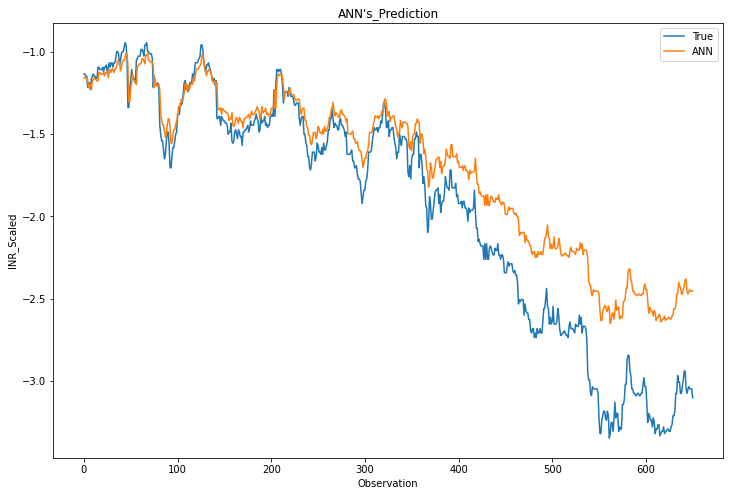

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

# Data preprocessing for LSTM

In [ ]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# LSTM

In [ ]:
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(1, X_train.shape[1]), 
                    activation='relu', 
                    kernel_initializer='lecun_uniform', 
                    return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
1565/1565 [==============================] - 7s 3ms/step - loss: 0.0107 - rmse: 0.1036
Epoch 2/100
1565/1565 [==============================] - 7s 4ms/step - loss: 0.0058 - rmse: 0.0759
Epoch 3/100
1565/1565 [==============================] - 5s 3ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 4/100
1565/1565 [==============================] - 5s 3ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 5/100
1565/1565 [==============================] - 6s 4ms/step - loss: 0.0058 - rmse: 0.0758
Epoch 6/100
1565/1565 [==============================] - 5s 3ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 7/100
1565/1565 [==============================] - 6s 4ms/step - loss: 0.0058 - rmse: 0.0764
Epoch 8/100
1565/1565 [==============================] - 5s 3ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 8: early stopping


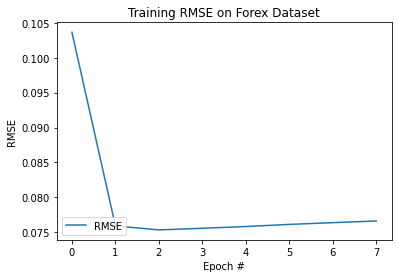

In [ ]:
N = 8

plt.figure()

plt.plot(np.arange(0, N), history_model_lstm.history["rmse"], label="RMSE")
plt.title("Training RMSE on Forex Dataset")
plt.xlabel("Epoch #")
plt.ylabel("RMSE")
plt.legend(loc="lower left")

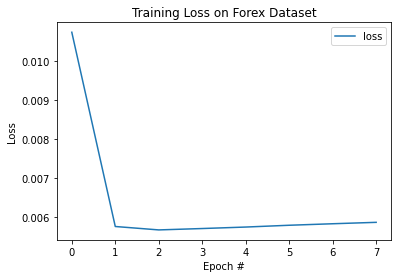

In [ ]:
N = 8

plt.figure()

plt.plot(np.arange(0, N), history_model_lstm.history["loss"], label="loss")
plt.title("Training Loss on Forex Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

# LSTM Prediction

In [ ]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

train_mse = metrics.mean_squared_error(y_train, y_train_pred_lstm)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test_lstm)
rmse_test = np.sqrt(test_mse)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The  MAE on the Train set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred_lstm)))

print("The  RMSE on the Train set is:\t{:0.3f}".format(rmse_train))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("The  MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test_lstm)))
print("The  RMSE on the Test set is:\t{:0.3f}".format(rmse_test))

49/49 [==============================] - 0s 5ms/step
The R2 score on the Train set is:	0.917
The  MAE on the Train set is:	0.213
The  RMSE on the Train set is:	0.288
The Adjusted R2 score on the Train set is:	0.917

The R2 score on the Test set is:	0.603
The Adjusted R2 score on the Test set is:	0.602
The  MAE on the Test set is:	0.326
The  RMSE on the Test set is:	0.459


# LSTM Prediction Plot

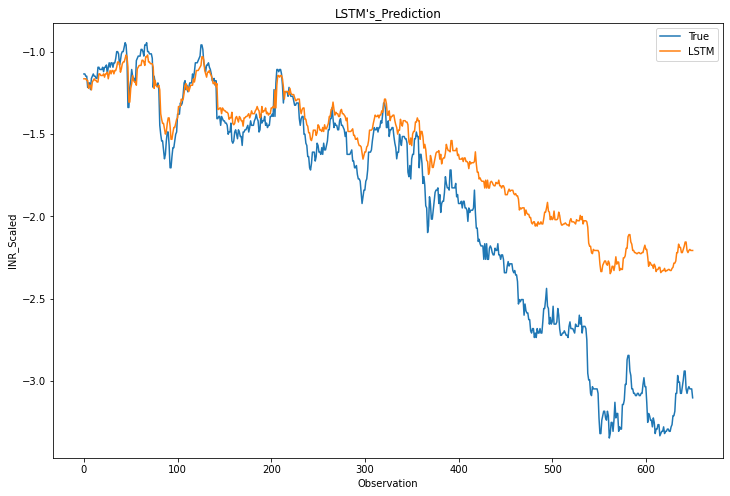

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

# GRU

In [ ]:
from keras.layers import GRU
K.clear_session()
model_gru = Sequential()
model_gru.add(GRU(7, input_shape=(1, X_train.shape[1]), 
                  activation='linear', 
                  kernel_initializer='lecun_uniform', 
                  return_sequences=False))
model_gru.add(Dense(1))
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 7)                 210       
                                                                 
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
history_model_gru = model_gru.fit(X_tr_t, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
1565/1565 [==============================] - 6s 3ms/step - loss: 0.0370 - rmse: 0.1923
Epoch 2/100
1565/1565 [==============================] - 5s 3ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 3/100
1565/1565 [==============================] - 6s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 4/100
1565/1565 [==============================] - 6s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 5/100
1565/1565 [==============================] - 4s 3ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 6/100
1565/1565 [==============================] - 4s 3ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 7/100
1565/1565 [==============================] - 6s 4ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 8/100
1565/1565 [==============================] - 5s 3ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 9/100
1565/1565 [==============================] - 5s 3ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 10/100
1565/1565 [==============================] - 6s 4ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 11/

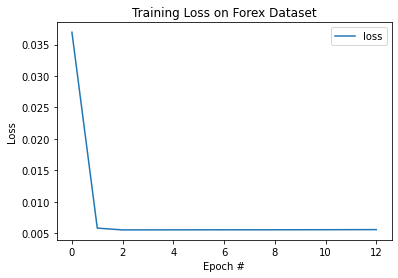

In [ ]:
N = 13

plt.figure()

plt.plot(np.arange(0, N), history_model_gru.history["loss"], label="loss")
plt.title("Training Loss on Forex Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

# GRU Prediction

In [ ]:
y_pred_test_gru = model_gru.predict(X_tst_t)
y_train_pred_gru = model_gru.predict(X_tr_t)

train_mse = metrics.mean_squared_error(y_train, y_train_pred_gru)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test_gru)
rmse_test = np.sqrt(test_mse)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_gru)))
print("The  MAE on the Train set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred_gru)))

print("The  RMSE on the Train set is:\t{:0.3f}".format(rmse_train))
r2_train = r2_score(y_train, y_train_pred_gru)
print("The Adjusted R2 score on the Train set is:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_gru)))
r2_test = r2_score(y_test, y_pred_test_gru)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("The  MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test_gru)))
print("The  RMSE on the Test set is:\t{:0.3f}".format(rmse_test))

49/49 [==============================] - 0s 4ms/step
The R2 score on the Train set is:	0.953
The  MAE on the Train set is:	0.168
The  RMSE on the Train set is:	0.217
The Adjusted R2 score on the Train set is:	0.953

The R2 score on the Test set is:	0.773
The Adjusted R2 score on the Test set is:	0.773
The  MAE on the Test set is:	0.247
The  RMSE on the Test set is:	0.347


# GRU Prediction Plot

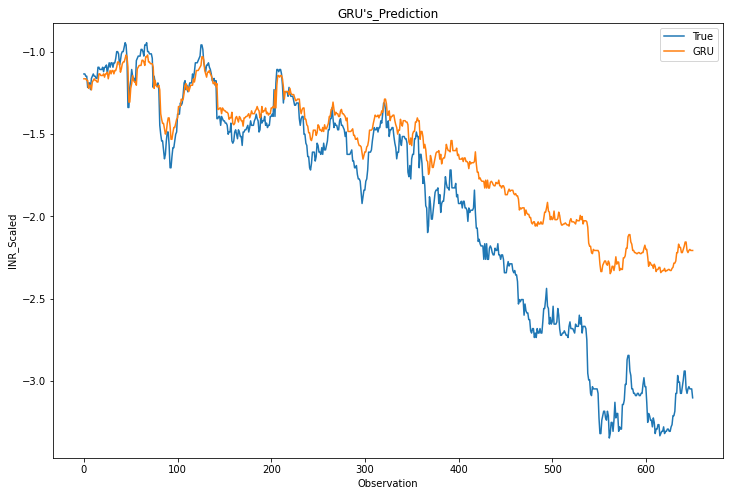

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='GRU')
plt.title("GRU's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

In [ ]:
inv_yhat = sc.inverse_transform(y_pred_test)

inv_yhat

array([[0.01366356],
       [0.01366356],
       [0.01366356],
       [0.01365591],
       [0.01365591],
       [0.01361767],
       [0.01363297],
       [0.01363297],
       [0.01361002],
       [0.01364826],
       [0.01365591],
       [0.01366356],
       [0.01365591],
       [0.01365591],
       [0.01364826],
       [0.01364826],
       [0.01368651],
       [0.01368651],
       [0.01367886],
       [0.01367886],
       [0.01367886],
       [0.01368651],
       [0.01367121],
       [0.01368651],
       [0.01368651],
       [0.01369416],
       [0.01366356],
       [0.01368651],
       [0.01370181],
       [0.01368651],
       [0.01370181],
       [0.01370181],
       [0.01368651],
       [0.01370181],
       [0.01370181],
       [0.01371713],
       [0.01374049],
       [0.01374049],
       [0.0137327 ],
       [0.01369416],
       [0.01370946],
       [0.0137327 ],
       [0.01374049],
       [0.01374049],
       [0.01375606],
       [0.01377163],
       [0.01376384],
       [0.013

In [ ]:
inv_ytest = sc.inverse_transform(y_test)

inv_ytest

array([[0.01368],
       [0.01368],
       [0.01367],
       [0.01367],
       [0.01362],
       [0.01364],
       [0.01364],
       [0.01361],
       [0.01366],
       [0.01367],
       [0.01368],
       [0.01367],
       [0.01367],
       [0.01366],
       [0.01366],
       [0.01371],
       [0.01371],
       [0.0137 ],
       [0.0137 ],
       [0.0137 ],
       [0.01371],
       [0.01369],
       [0.01371],
       [0.01371],
       [0.01372],
       [0.01368],
       [0.01371],
       [0.01373],
       [0.01371],
       [0.01373],
       [0.01373],
       [0.01371],
       [0.01373],
       [0.01373],
       [0.01375],
       [0.01378],
       [0.01378],
       [0.01377],
       [0.01372],
       [0.01374],
       [0.01377],
       [0.01378],
       [0.01378],
       [0.0138 ],
       [0.01382],
       [0.01381],
       [0.01375],
       [0.01353],
       [0.01353],
       [0.01362],
       [0.01365],
       [0.0137 ],
       [0.01367],
       [0.01366],
       [0.01366],
       [0.

In [ ]:
test_mse = metrics.mean_squared_error(inv_ytest, inv_yhat)
rmse_test = np.sqrt(test_mse)


print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(inv_ytest, inv_yhat)))
r2_test = r2_score(inv_ytest, inv_yhat)
print("The Adjusted R2 score on the Test set is:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))
print("The  MAE on the Test set is:\t{:0.3f}".format(metrics.mean_absolute_error(inv_ytest, inv_yhat)))
print("The  RMSE on the Test set is:\t{:0.3f}".format(rmse_test))

The R2 score on the Test set is:	0.792
The Adjusted R2 score on the Test set is:	0.791
The  MAE on the Test set is:	0.000
The  RMSE on the Test set is:	0.000


In [ ]:
test.head()

,Price
Date,
2021-01-01,0.01368
2021-01-03,0.01368
2021-01-04,0.01368
2021-01-05,0.01367
2021-01-06,0.01367


In [ ]:
col1 = pd.DataFrame(inv_ytest, columns=['Price'])

col2 = pd.DataFrame(inv_yhat, columns=['ANN_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['rmse'], columns=['RMSE'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_csv('Prediction_USD_INR_ANN.xlsx')

In [ ]:
results.head()

,Price,ANN_prediction,RMSE
0,0.01368,0.013664,0.103639
1,0.01368,0.013664,0.075925
2,0.01367,0.013664,0.075346
3,0.01367,0.013656,0.075581
4,0.01362,0.013656,0.075832


In [ ]:
test.reset_index(level=0, inplace=True)
test.head()

,Date,Price
0,2021-01-01,0.01368
1,2021-01-03,0.01368
2,2021-01-04,0.01368
3,2021-01-05,0.01367
4,2021-01-06,0.01367


In [ ]:
dfinal = test.merge(results, how='inner', left_on='Price', right_on='Price')

In [ ]:
dfinal.drop_duplicates(subset="Date",inplace=True)


dfinal.head()

,Date,Price,ANN_prediction,RMSE
0,2021-01-01,0.01368,0.013664,0.103639
7,2021-01-03,0.01368,0.013664,0.103639
14,2021-01-04,0.01368,0.013664,0.103639
21,2021-01-14,0.01368,0.013664,0.103639
28,2021-02-01,0.01368,0.013664,0.103639


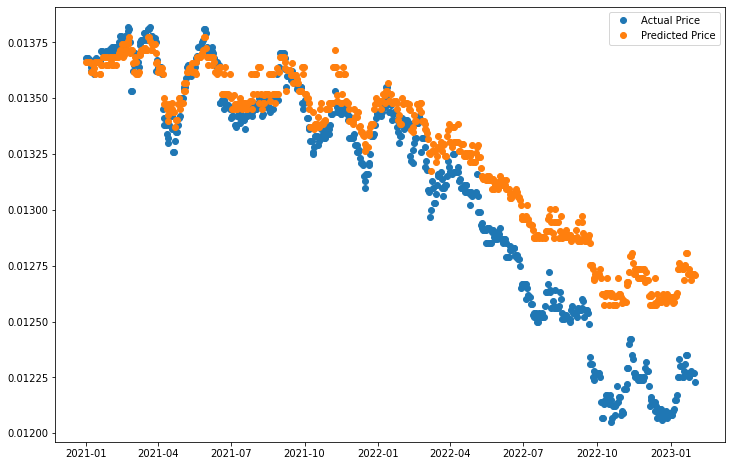

In [ ]:
plt.figure(figsize=(12,8))
price_date = dfinal['Date']
price_true = dfinal['Price']
price_pred = dfinal['ANN_prediction']
plt.plot_date(price_date, price_true,label='Actual Price')
plt.plot_date(price_date, price_pred,label='Predicted Price')
plt.legend()
plt.show()

In [ ]:
dfinal.describe()

,Price,ANN_prediction,RMSE
count,652.000000,652.000000,34.000000
mean,0.013096,0.013270,0.082457
std,0.000536,0.000363,0.011932
min,0.012050,0.012576,0.075346
25%,0.012580,0.012936,0.075832
50%,0.013320,0.013397,0.076135
75%,0.013490,0.013572,0.076624
max,0.013820,0.013772,0.103639
